In [1]:
import os
import pandas as pd
import numpy as np

from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle('../dataset/SS/clean/withlabel_SPECTER.pkl')
df.head()

,title,abstract,relatedwork_text,main_text,rw_citations,full_citations,SPECTER_embeddings,label
paper_id,,,,,,,,
859921,Summarizing Reviews with Variable-length Synta...,Abstract. We present a novel summarization fra...,We first look at how text excerpts are extract...,Abstract. We present a novel summarization fra...,"[5965756, 1599046, 3177797, 444032, 6884774]","[1599046, 11055565, 16393334, 2481864, 5965756...","[-0.7218136, 0.99761677, -0.27647057, 0.235195...",2
129124,Can Document Selection Help Semi-supervised Le...,Annotating training data for event extraction ...,Self-training has been applied to several natu...,Annotating training data for event extraction ...,"[1398439, 7419156, 11187670, 8336242, 15894892...","[1398439, 7419156, 7579604, 11187670, 8336242,...","[-0.46521527, 0.17172785, 0.27331015, 0.088347...",2
1345235,Optimizing Sparse Matrix–Vector Product Comput...,Large-scale scientific applications frequently...,A variety of different data and computation re...,Large-scale scientific applications frequently...,"[1794629, 9580801, 120335238, 15090599, 208582...","[1794629, 9580801, 120335238, 15090599, 208582...","[-0.16910633, 0.8334114, 0.039647657, -0.09229...",3
2624639,Enhanced Chosen-Ciphertext Security and Applic...,We introduce and study a new notion of enhance...,ECCA is similar in spirit to coin-revealing se...,We introduce and study a new notion of enhance...,"[41204165, 19655, 235427, 226828, 3148885]","[443317, 41204165, 7113862, 10098664, 226828, ...","[0.12169194, 0.04154425, 0.2388953, 0.03814739...",1
146120525,ARSM: Augment-REINFORCE-Swap-Merge Estimator f...,To address the challenge of backpropagating th...,"For optimizing (1) for categorical z, the diff...",To address the challenge of backpropagating th...,"[3535369, 5859948, 1758804, 10756562, 19115634...","[121929631, 4043645, 5859948, 7195970, 1075656...","[-0.8591176, 0.8032798, -0.012844058, 0.021643...",2


In [3]:
Counter(df['label'])

Counter({2: 4160, 3: 4914, 1: 4047, 0: 7807, 4: 6489})

In [4]:
df_cluster = df.loc[df.label == 0]
df_cluster.head()

,title,abstract,relatedwork_text,main_text,rw_citations,full_citations,SPECTER_embeddings,label
paper_id,,,,,,,,
42490916,Person Re-Identification as Image Retrieval Us...,Person re-identification is a challenging prob...,Person Re-identification A lot of methods have...,Person re-identification is a challenging prob...,"[11864530, 3961724, 16510219, 6485959, 7973738...","[14678946, 425268, 11864530, 14457153, 9107599...","[-1.0266498, 0.994633, 0.11097328, -0.20333652...",0
54439672,Revisiting the Softmax Bellman Operator: Theor...,The softmax function has been primarily employ...,Among variants of the DQN in Mnih et al. (2015...,The softmax function has been primarily employ...,"[5389801, 205242740, 19135734, 13022595, 68753...","[14530441, 13022595, 10713737, 5389801, 198118...","[-0.19075102, -0.69243807, 0.12877731, 0.69504...",0
27941462,HapRing: A Wearable Haptic Device for 3D Inter...,Haptic devices have the capability to offer go...,Preliminary research on finger-worn devices ex...,Haptic devices have the capability to offer go...,"[1749365, 207178608, 11112792, 10569979, 15182...","[1749365, 59860781, 207178608, 11112792, 10569...","[-0.2549635, 0.2130752, 0.90859884, -0.0577106...",0
53873286,Evaluating reinforcement learning state repres...,Reinforcement learning has shown potential for...,Many research studies have recognized and disp...,Reinforcement learning has shown potential for...,"[4949646, 44019896, 18049436, 29073892, 538732...","[44019896, 10523205, 208910339, 18533192, 1537...","[0.32041845, -0.055096526, 0.05453059, 0.33849...",0
213175531,Pedestrian Detection: The Elephant In The Room,Pedestrian detection is used in many vision ba...,Pedestrian detection. Before the emergence of ...,Pedestrian detection is used in many vision ba...,"[16824129, 14020880, 206590483, 206764948, 291...","[1547290, 206787478, 7820575, 206764948, 19534...","[-0.3999968, 0.5237049, -0.19973156, -0.022197...",0


In [5]:
# Multi hot encoding for related works citations
mlb = MultiLabelBinarizer(sparse_output=True)

Y = pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df_cluster['rw_citations']),
                index=df_cluster.index,
                columns=mlb.classes_)
Y.columns = Y.columns.astype(str)

In [6]:
Y.sum().value_counts()[0:20]

1     26555
2      4854
3      1877
4      1023
5       547
6       380
7       270
8       200
9       144
10      117
12       95
11       69
13       68
15       41
14       38
16       34
18       21
17       19
20       17
19       17
dtype: int64

In [7]:
Y.sum().mean()

1.9225764120509596

In [8]:
Y.sum().value_counts()[5:].sum()

1722

In [9]:
#Filter out papers that are not cited at least a few times
Y = Y[Y.columns[Y.sum() > 4]]
Y

,10004927,10005005,10012350,1003795,10044277,10048432,10053115,10054272,10057476,10060022,...,987239,9893011,9901844,9926549,9933254,9936656,9944232,9957731,996788,9971732
paper_id,,,,,,,,,,,,,,,,,,,,,
42490916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54439672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27941462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53873286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213175531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8425229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26037251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86772833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Remove papers with less than 1 cited papers after filter
Y = Y.loc[Y.sum(axis=1) > 1]
Y.shape

(4361, 2269)

In [11]:
X = pd.DataFrame(df_cluster['SPECTER_embeddings'].to_list(), index= df_cluster.index)

#Filter out the same rows for predictive variables as well
X = X[X.index.isin(Y.index)]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
paper_id,,,,,,,,,,,,,,,,,,,,,
42490916,-1.026650,0.994633,0.110973,-0.203337,0.523484,0.236519,-0.349746,0.482841,1.064224,0.850576,...,0.602027,0.034141,-0.030774,0.388154,0.015196,-0.408135,0.700197,-0.115859,0.217704,0.516770
54439672,-0.190751,-0.692438,0.128777,0.695049,-0.192414,0.688506,1.116827,0.851380,0.696710,0.195115,...,0.747377,-1.297828,0.747788,0.666446,-0.611793,-0.146024,0.492655,0.685688,-0.473533,1.157149
213175531,-0.399997,0.523705,-0.199732,-0.022198,-0.326854,0.076296,0.096575,-0.044104,0.938657,0.969292,...,-0.156878,-0.065437,0.180335,0.012265,-0.334170,-0.638257,0.465312,0.236421,-0.702101,0.507330
9506814,-0.192253,0.675746,0.515082,-0.156564,0.562275,0.499302,0.423574,0.400053,0.199794,0.202120,...,1.057663,-0.162371,0.644905,0.144199,-0.194226,-0.951736,-0.021832,-0.490860,-0.431413,0.343492
3815098,-0.928529,0.923144,-0.278707,0.429758,-0.157087,0.753006,0.088561,0.222047,0.573633,0.156539,...,0.907759,-0.427098,0.231713,0.969599,-0.287338,-0.112299,1.000033,-0.615851,-0.071888,0.152747


In [12]:
print(X.shape)
print(Y.shape)

(4361, 768)
(4361, 2269)


In [13]:
#Create train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [14]:
#Create train set and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=1)

In [15]:
print(X_train.shape)
print(Y_train.shape)

(3335, 768)
(3335, 2269)


# NN Model

In [16]:
batch_size = 256
num_classes = Y_train.shape[1]
epochs = 100

In [17]:
Y_test.shape

(655, 2269)

In [18]:
embedding_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(768, input_dim=embedding_dim, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 768)               590592    
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              1538000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4000)              8004000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 4000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2269)              9

In [19]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=15)
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[es],
                    validation_data=(X_val, Y_val))

Epoch 1/100
14/14 [==============================] - 2s 146ms/step - loss: 0.0183 - accuracy: 0.0177 - val_loss: 0.0175 - val_accuracy: 0.0027
Epoch 2/100
14/14 [==============================] - 2s 130ms/step - loss: 0.0177 - accuracy: 0.0273 - val_loss: 0.0171 - val_accuracy: 0.0539
Epoch 3/100
14/14 [==============================] - 2s 138ms/step - loss: 0.0169 - accuracy: 0.0396 - val_loss: 0.0163 - val_accuracy: 0.0404
Epoch 4/100
14/14 [==============================] - 2s 131ms/step - loss: 0.0158 - accuracy: 0.0273 - val_loss: 0.0155 - val_accuracy: 0.0539
Epoch 5/100
14/14 [==============================] - 2s 127ms/step - loss: 0.0148 - accuracy: 0.0345 - val_loss: 0.0153 - val_accuracy: 0.0270
Epoch 6/100
14/14 [==============================] - 2s 127ms/step - loss: 0.0141 - accuracy: 0.0321 - val_loss: 0.0151 - val_accuracy: 0.0162
Epoch 7/100
14/14 [==============================] - 2s 126ms/step - loss: 0.0135 - accuracy: 0.0423 - val_loss: 0.0147 - val_accuracy: 0.0270

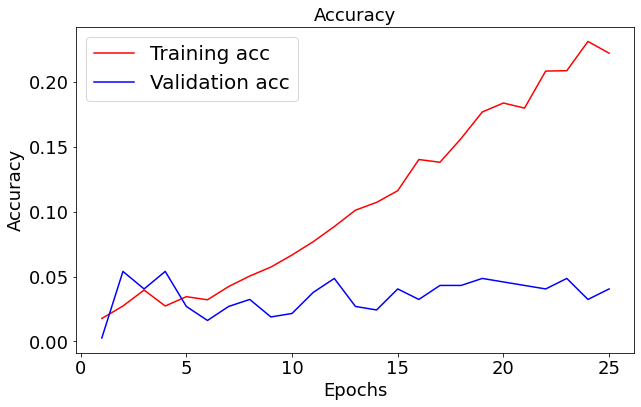

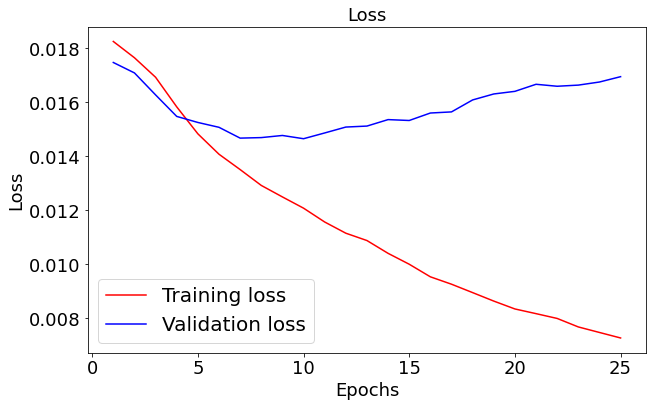

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(epochs, acc, 'r', label='Training acc')
ax.plot(epochs, val_acc, 'b', label='Validation acc')
ax.set_title('Accuracy', fontsize=18)
ax.set_xlabel(r'Epochs', fontsize=18)
ax.set_ylabel(r'Accuracy', fontsize=18)
ax.tick_params(labelsize=18)
ax.legend(fontsize=20)

plt.show()

figL, axL = plt.subplots(1,1, figsize=(10,6))

axL.plot(epochs, loss, 'r', label='Training loss')
axL.plot(epochs, val_loss, 'b', label='Validation loss')
axL.set_title('Loss', fontsize=18)
axL.set_xlabel(r'Epochs', fontsize=18)
axL.set_ylabel(r'Loss', fontsize=18)
axL.tick_params(labelsize=18)
axL.legend(fontsize=20)

plt.show()

# Model Evaluation with Information Retrieval Metrics

In [21]:
from src.metric_utils import MAP_score
from src.metric_utils import Recall_score

In [22]:
#Get probabilities for each citation
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [23]:
train_MAP, test_MAP = MAP_score(Y_train, Y_test, train_predictions, test_predictions, top_k=5)

print("Training MAP Score: ", train_MAP)
print("Test MAP Score: ", test_MAP)

Training MAP Score:  0.6392603698150925
Test MAP Score:  0.08840542832909244


In [24]:
train_recall, test_recall = Recall_score(Y_train, Y_test, train_predictions, test_predictions, top_k=10)

print("Training Recall Score @10:", train_recall)
print("Test Recall Score @10:", test_recall)

Training Recall Score @10: 0.9269007641639163
Test Recall Score @10: 0.19626984580145831


In [25]:
train_recall, test_recall = Recall_score(Y_train, Y_test, train_predictions, test_predictions, top_k=20)

print("Training Recall Score @20:", train_recall)
print("Test Recall Score @20:", test_recall)

Training Recall Score @20: 0.9777938570358439
Test Recall Score @20: 0.2983470769266393


In [26]:
train_recall, test_recall = Recall_score(Y_train, Y_test, train_predictions, test_predictions, top_k=50)

print("Training Recall Score @50:", train_recall)
print("Test Recall Score @50:", test_recall)

Training Recall Score @50: 0.9953439543155158
Test Recall Score @50: 0.4544354828236592


In [27]:
train_recall, test_recall = Recall_score(Y_train, Y_test, train_predictions, test_predictions, top_k=100)

print("Training Recall Score @100:", train_recall)
print("Test Recall Score @100:", test_recall)

Training Recall Score @100: 0.9978768051998477
Test Recall Score @100: 0.584635211747504
